In [1]:
%matplotlib widget

In [2]:
isdark = True

In [3]:
from rayoptics.environment import *

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [6]:
pupil_diameter = 80.
pupil_radius = pupil_diameter/2
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=pupil_diameter)

# single view
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0.])

# wavelength: 550nm
osp.spectral_region = WvlSpec([(550.0, 1.0)], ref_wl=0)

In [7]:
sm.gaps[0].thi=1e+10

In [8]:
tertiary_mirror_perturb = srf.DecenterData('dec and return')
fs_mirror_perturb = srf.DecenterData('dec and return')

In [9]:
tertiary_mirror_perturb.euler[0] = 4  # tilt tertiary mirror 4 mrad about the y-axis

In [10]:
opm.add_mirror(lbl='PRIMARY', r=-161., profile=Spherical, t=-70.)
opm.add_mirror(lbl='SECONDARY', profile=Spherical, c=-0.053, t=80)
opm.add_mirror(lbl='TERTIARY', profile=Spherical, c=-0.019, t=-20., decenter=tertiary_mirror_perturb, sd=pupil_diameter)
opm.add_mirror(lbl='FINE STEERING', profile=Conic, c=0.00, t=30., decenter=fs_mirror_perturb)

In [11]:
opm.update_model()

In [12]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
PRIMARY:    -0.006211     -70.0000       air    reflect -1      40.000
SECONDARY:    -0.053000      80.0000       air    reflect  1      4.0886
TERTIARY:    -0.019000     -20.0000       air    reflect -1      1.1785
FINE STEERING:     0.000000      30.0000       air    reflect  1      4.4181
  Img:     0.000000      0.00000                       1      9.2638


In [13]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
PRIMARY:  -0.00621118          reflect
                    -70.0000          air
SECONDARY:   -0.0530000          reflect
                     80.0000          air
TERTIARY:   -0.0190000          reflect     dec and return     0.0000     4.0000
                    -20.0000          air
FINE STEERING:      0.00000          reflect     dec and return     0.0000     0.0000
                     30.0000          air
  Img:      0.00000                 


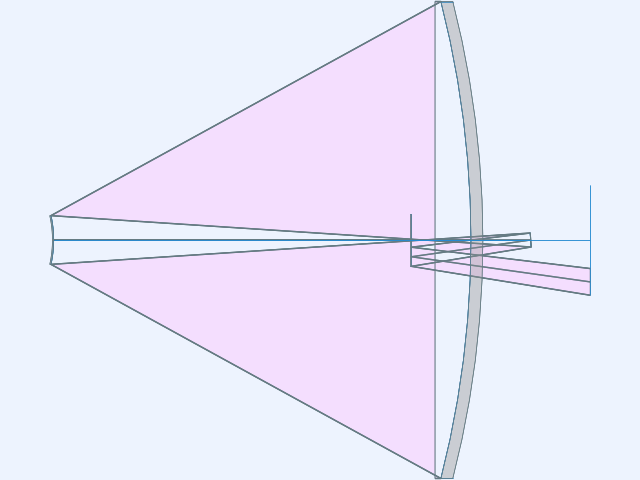

In [14]:
plt.ion()
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [15]:
s3=sm.ifcs[3]
print(s3)

Surface(lbl='TERTIARY', profile=Spherical(c=-0.019), interact_mode='reflect')


In [16]:
print(s3.decenter)

'dec and return': Decenter: array([0., 0., 0.]), Tilt: array([4., 0., 0.])


In [17]:
print(tertiary_mirror_perturb)

'dec and return': Decenter: array([0., 0., 0.]), Tilt: array([4., 0., 0.])


In [18]:
sm.list_gaps()

0 Gap(t=10000000000.0, medium=Air())
1 Gap(t=-70.0, medium=Air())
2 Gap(t=80, medium=Air())
3 Gap(t=-20.0, medium=Air())
4 Gap(t=30.0, medium=Air())


In [19]:
sm.list_decenters()

              thi    medium/mode          type          y       alpha
    0:  1.00000e+10          air
    1:     -70.0000          air
    2:      80.0000          air
    3:                   reflect  dec and return     0.0000     4.0000
    3:     -20.0000          air
    4:                   reflect  dec and return     0.0000     0.0000
    4:      30.0000          air
    5:                     dummy


In [20]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(lbl='PRIMARY', profile=Spherical(c=-0.006211180124223602), interact_mode='reflect')
2 Surface(lbl='SECONDARY', profile=Spherical(c=-0.053), interact_mode='reflect')
3 Surface(lbl='TERTIARY', profile=Spherical(c=-0.019), interact_mode='reflect')
4 Surface(lbl='FINE STEERING', profile=Conic(c=0.0, cc=0.0), interact_mode='reflect')
5 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


### First order data

In [21]:
pm.first_order_data()

efl               127.9
ffl                2537
pp1                2665
bfl               11.04
ppk               116.8
f/#               1.598
m            -1.279e-08
red           -7.82e+07
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius           40
na obj            4e-09
n obj                 1
img_dist          11.04
img_ht            2.232
exp_dist         -1.475
exp_radius        2.016
na img          -0.2985
n img                 1
optical invariant       0.6982


#### Spot Diagram for Flat Fine Steering Mirror

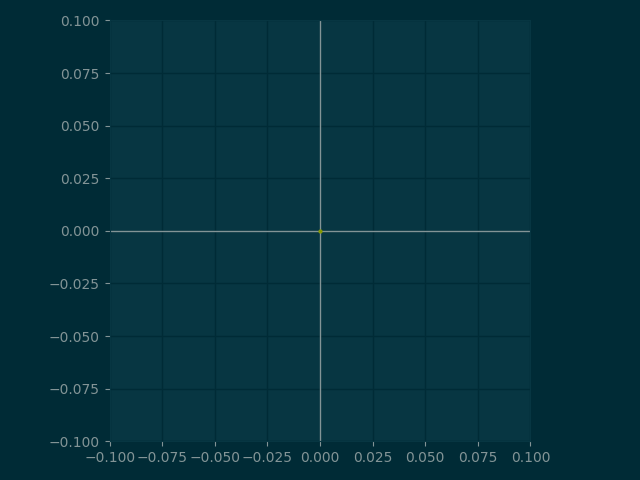

In [22]:
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
                      user_scale_value=0.1, is_dark=isdark).plot()

Tilt fine steering mirror by 5 mrads about the y axis and replot spot diagram

In [23]:
fs_mirror_perturb.euler[0] += 5
print(fs_mirror_perturb)

'dec and return': Decenter: array([0., 0., 0.]), Tilt: array([5., 0., 0.])


In [24]:
opm.update_model()

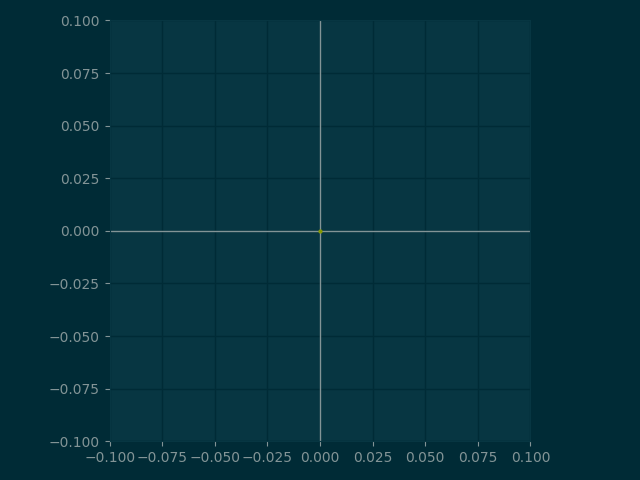

In [25]:
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
                      user_scale_value=0.1, is_dark=isdark).plot()